# CSE-221710309053 -Hari Sarmishta

# Question:
### Use the Boston House Prices Dataset and perform the below steps:

    Visualize all the input columns with the output column.Write your observations based on the plots generated, how the particular input is showing effect on the output

    Remove any of the one variable from the dataset if correlation is greater than 0.9. 
    Example: (X1 and X2 are highly correlated to each other. Correlation value between X1 and X2 is 0.92, then  drop X1 or X2) 

    Split the data into training and test with a split ratio of 80-20(80% of the data into training data and 20% of the data into testing)

    Apply feature scaling on the input columns, and build the Multiple Linear Regression Model. Check the performance on training and testing. Write your inferences on performance metrics and error metrics.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['MV']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


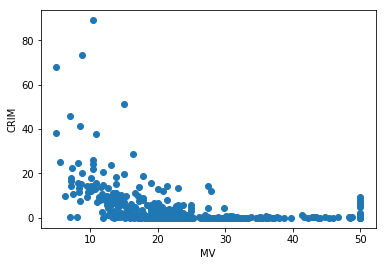

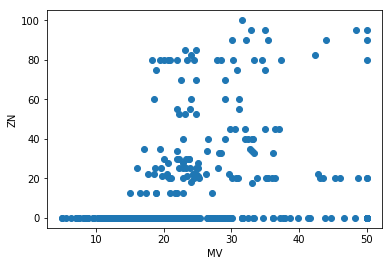

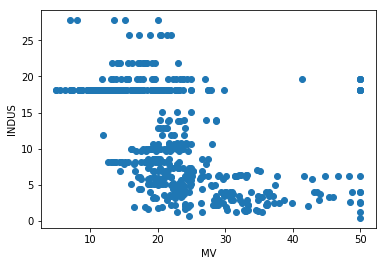

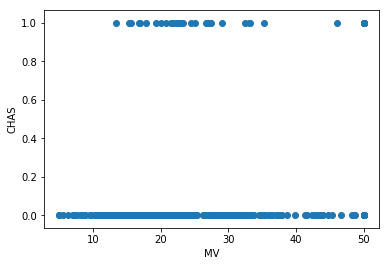

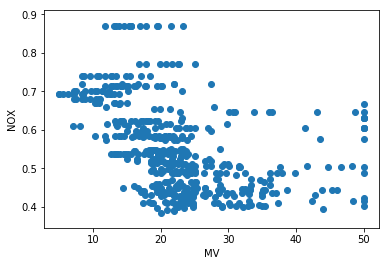

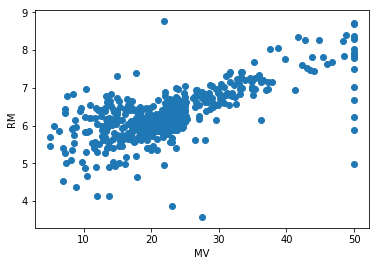

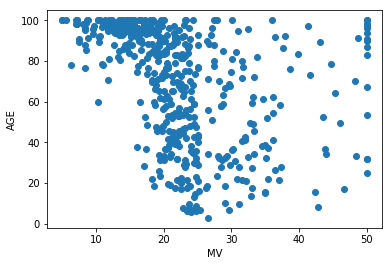

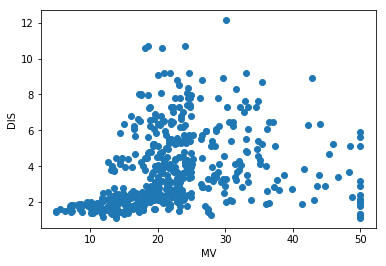

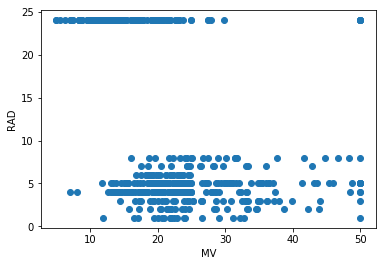

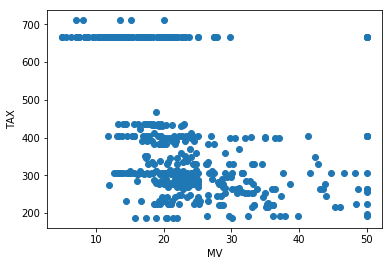

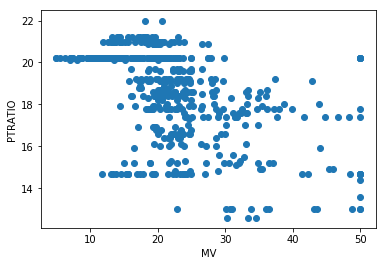

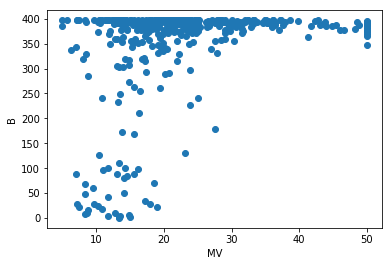

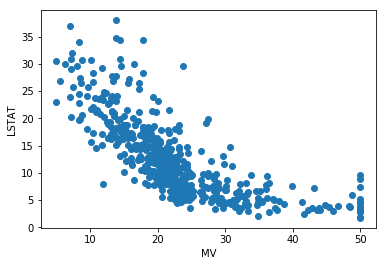

In [5]:
for i in boston.feature_names:
    plt.xlabel("MV")
    plt.ylabel(i)
    plt.scatter(df['MV'],df[i])
    plt.show()

    In 1st Graph i.e.,Relation Between MV and CRIM
    CRIM column doesn't show much effect on MV column
    In 2nd Graph i.e.,Relation Between MV and ZN
    ZN column doesn't show much effect on MV column
    In 3rd Graph i.e.,Relation Between MV and INDUS
    INDUS column doesn't show much effect on MV column
    In 4th Graph i.e.,Relation Between MV and CHAS
    CHAS column doesn't show much effect on MV column
    In 5th Graph i.e.,Relation Between MV and NOX
    NOX column doesn't show much effect on MV column
    In 6th Graph i.e.,Relation Between MV and RM
    RM column shows stong positive effect on MV column
    In 7th Graph i.e.,Relation Between MV and Age
    Age column shows slight negative much effect on MV column
    In 8th Graph i.e.,Relation Between MV and DIS
    DIS column shows slight positive much effect on MV column
    In 9th Graph i.e.,Relation Between MV and RAD
    RAD column doesn't show much effect on MV column
    In 10th Graph i.e.,Relation Between MV and TAX
    TAX column doesn't show much effect on MV column
    In 11th Graph i.e.,Relation Between MV and PTRATIO
    PTRATIO column doesn't show much effect on MV column
    In 12th Graph i.e.,Relation Between MV and B
    B column doesn't show much effect on MV column
    In 13th Graph i.e.,Relation Between MV and LSTAT
    LSTAT column shows negative effect on MV column

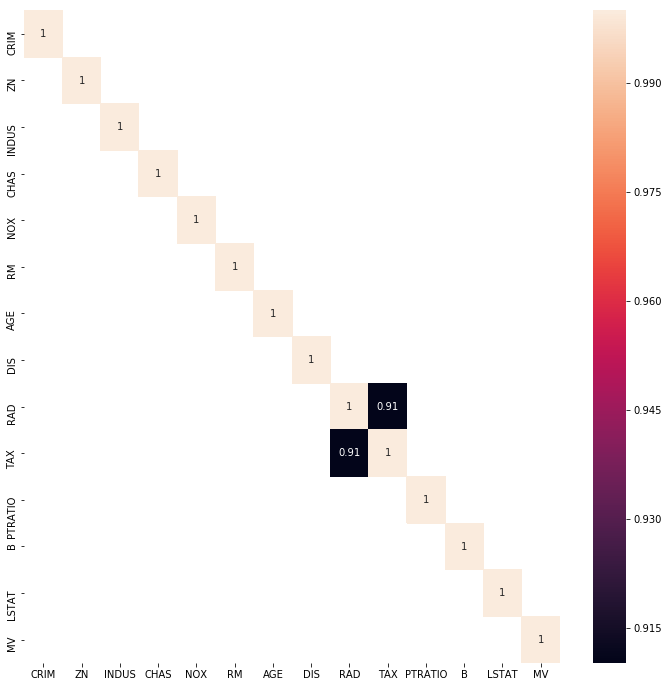

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()[df.corr()>=0.9],annot=True)

### Only TAX and RAD columns have correlation of 0.91
### drop RAD Column

In [7]:
X=df.drop(['MV','RAD'],axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,386.71,17.10


In [8]:
y=df[['MV']]
y

,MV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 12)
(404, 1)
(102, 12)
(102, 1)


In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred=lr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [14]:
print("r2_score:",r2_score(y_test,y_pred))
print("adjusted_r2_score:",1- (1-r2_score(y_test, y_pred))*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.7789181825925783
adjusted_r2_score: 0.7491093982230382
MAE: 3.1373277967003377
MSE: 18.495634507817435
RMSE: 4.300655125421874
